## Introduction

This material was prepared by Danie Benetton. 

Project financially supported by the University of British Columbia, Department of Chemical and Biological Engineering (CBHE).

August 2020

This Jupyter Notebook is an overview of the functions for optimization using Pyomo and SciPy packages that are used in CHBE coursework.

## Instructions
**Preferred method:**

To use this notebook, make sure Anaconda is installed [Link to Download](https://www.anaconda.com/products/individual)

This tutorial is best run in **JupyterLab.** [JupyterLab Introduction Video](https://www.youtube.com/watch?v=A5YyoCKxEOU). 

Ensure that you have the JupyterLab extension "@jupyterlab/toc" installed to navigate this document. This can be easily installed through the Extension Manager.

**Alternative method:**

UBC students and professors can also access this notebook through [Syzygy](https://ubc.syzygy.ca/). Log in with your CWL, upload this notebook to your files, and run the notebook.

## Installing the Pyomo Library

For this notebook, the installation of the **Pyomo library is required.** Installation instructions, as well as general information about the library, can be found [in the documentation.](https://pyomo.readthedocs.io/en/stable/)

The **simplest method** is to run the following command in the Anaconda prompt: `conda install -c conda-forge pyomo`

## Matplotlib settings

In [1]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams.update({'mathtext.fontset': 'cm'})
mpl.rcParams.update({'axes.labelsize': 22})
mpl.rcParams.update({'axes.titlesize': 16})
mpl.rcParams.update({'axes.linewidth': 0.5})
mpl.rcParams.update({'xtick.labelsize': 10})
mpl.rcParams.update({'ytick.labelsize': 10})
%config InlineBackend.figure_formats = ['svg']

# Basic Optimization with SciPy

The SciPy package offers easy-to-use functions for basic optimization problems.  
An advantage of this package is that is is already installed with most scientific Python distributions, such as Anaconda.

To import the optimization module, **run the cell below**:

In [2]:
import numpy as np
from scipy.optimize import *

SciPy has several commonly used optimization methods available:
* `minimize_scalar()` and `minimize()` to minimize a function of one variable and many variables, respectively
* `leastsq()` for Least-squares minimization algorithm
* `curve_fit()` to fit a function to a set of data
* `root_scalar()` and `root()` to find the zeros of a function of one variable and many variables, respectively
* `linprog()` to minimize a linear objective function with linear inequality and equality constraints



## Minimizing Functions - Single and Multivariable

SciPy has two minimization functions:

**Single variable minimizing:**
`minimize_scalar(fun, bracket=None, method='brent', tol=None, options=None)`
* `fun` is the function to minimize
* with `bracket` you can set an interval to narrow down the search
* `tol` sets the tolerance for termination
* Further documentation: [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize_scalar.html#scipy.optimize.minimize_scalar)

**Multivariable minimizing:**
`minimize(fun, x0, method=None,tol=None)`
* `fun` is the function to minimize
* `x0` is a vector for initial guesses
* `method` may be specified
* `tol` sets the tolerance for termination
* Further documentation: [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize)

### Example: Single Variable Minimum

Pressure  measurements  are  taken  at  certain  points  behind  an  airfoil  over  time.  These  data  best  fit  the  curve  $y = 6\cos{x} - 1.5\sin{x}$ from $x = 0$ to $6$ s. Use four iterations of the golden-search method to find the minimum pressure. Set $x_l = 2$ and $x_u = 4$.

In [3]:
def fun(x): return 6*np.cos(x)-1.5*np.sin(x)

minimize_scalar(fun, bracket= (2,4), method='golden', tol=None, options={'maxiter': 4})

     fun: -6.177636231526744
    nfev: 9
     nit: 4
 success: False
       x: 2.944271906683285

### Example: Multidimensional Minimization

The two-dimensional distribution of pollutant concentration in a channel can be described by   

$$
c(x, y) = 7.9 + 0.13x+ 0.21y − 0.05x^2−0.016y^2− 0.007xy
$$

Determine the exact location of the peak concentration given the function and the knowledge that the peak lies within the bounds $−10 ≤x≤ 10$ and $0 ≤y≤ 20$.

**Solution:**

Since we are looking for the peak concentration, we must minimize the negative of $c(x,y)$. The variables should be defined as a 1D array, so $x = x[0]$ and $y = x[1]$. The position of peak concentration is approximately $x = 0.854, y = 6.38$

In [4]:
def c(x): return -( 7.9 + 0.13*x[0] + 0.21*x[1] - 0.05*x[0]**2 - 0.016*x[1]**2 -0.007*x[0]*x[1] )

minimize(c, x0 = (0,10), bounds = ((-10,10),(0,20)))

      fun: -8.624944462065804
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.0000000e+00, -7.1054274e-07])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 18
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([0.85369939, 6.37572889])

## Curve Fitting and Root Finding

The SciPy optimization package includes functions for curve fitting using non-linear least squares, and for root finding using a selected method

* `curve_fit(f, xdata, ydata)`: [Link to documentation.](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html#scipy.optimize.curve_fit) Fits a curve to nonlinear data using non-linear least squares without the need for transformation of data
* `root_scalar(f, method=None, bracket=None, x0=None`): [Link to documentation.](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root_scalar.html#scipy.optimize.root_scalar) Finds a root of a scalar function. Optional parameters allow you to specify a method, specify bracket or guess.

Brief examples will be given for these functions, as curve fitting and root finding methods are covered more in-depth in the main Python For CHBE notebook.

### Example: Curve Fitting with SciPy

Import the data from *nonlinear_data.txt* and use `scipy.optimize.curve_fit()` to fit to the function $ y = a_0 e^{a_1 x^2} $, since we know the data follows that form.

[20.07642993 -0.99121504]


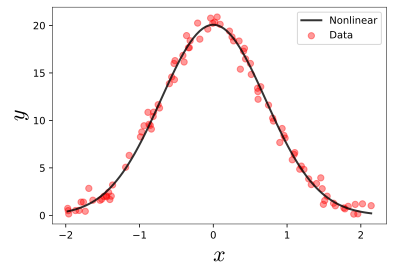

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# read data
data = np.loadtxt('nonlinear_data.txt')
# 1st column is x and 2nd column is y
x, y = data[:, 0], data[:, 1]

from scipy.optimize import curve_fit

# defining model function _______________________________
def f(x, a0, a1): return  a0 * np.exp(a1 * x**2)

# finding the coefficients with least-squares fit
opt, _ = curve_fit(f, x, y)
print(opt)
x_fit = np.linspace(x.min(), x.max(), 100)
y_fit= f(x_fit, *opt)

# plotting _______________________________
fig, ax = plt.subplots()
# plot data
ax.scatter(x, y, s=40, color='red', alpha=0.4, label='Data')
# plot fit
ax.plot(x_fit, y_fit, linewidth=2, color='black', alpha=0.8, label='Nonlinear')


ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.legend()

### Example: Root Finding with SciPy

Find the root of the equation $x^3-1$ using the Newton method with an initial guess of 0.2.

In [6]:
def f(x): return (x**3 - 1)  # only one real root at x = 1
def fprime(x): return 3*x**2

root_scalar(f, x0=0.2, fprime=fprime, method='newton')

      converged: True
           flag: 'converged'
 function_calls: 22
     iterations: 11
           root: 1.0

## Linear Programming

While SciPy has support for [linear programming](https://docs.scipy.org/doc/scipy/reference/optimize.html#linear-programming) through `linprog()` and associated functions, it remains a basic and general purpose set of functions. As models become more complex, the functionality is limited. For this reason, a dedicated optimization package, such as **Pyomo**, is recommended for more involved models.

# Optimization Models with Pyomo

**Pyomo** is a Python optimization library that allows users to define a wide range of optimization problems, and define the problem parameters with built-in definitions.

When optimizing larger problems, it is recommended to use Pyomo or other dedicated optimization packages over SciPy for several reasons:
* high level representation of variables, constraints, objectives etc.
* support for nonlinear optimization and multi-objective optimization
* can choose from dozens of solvers

For more detail on what an optimization tool like Pyomo can be used for, follow [this link.](https://pyomo.readthedocs.io/en/stable/pyomo_overview/math_modeling.html)

Running the following cell will install the Pyomo package for you:

In [7]:
!pip install pyomo

To import the Pyomo package, **run the following code cell:**

In [8]:
import pyomo.environ as pyomo

To demonstrate the use of this package, several examples of increasing difficulty will be used.

The following Python classes are used to create a model:
* **Var** optimization variables in a model
* **Objective** expressions that are minimized or maximized in a model
* **Constraint** constraint expressions in a model
* **Set** set data that is used to define a model instance
* **Param** parameter data that is used to define a model instance

## Abstract versus Concrete Models



Pyomo has the capability to solve abstract or concrete models.

* **Abstract models**: Components are initialized with symbols to represent data points, and later supplied with values to obtain a solution.
* **Concrete models**: Components are immediately initialized when defining the model.

## Note on Solvers

To view the currently supported solvers, run the following command in a terminal: `pyomo help -s`

Pyomo is not distributed with any solvers, so these must be installed individually. Below are some of the instructions for installing a few solver packages. Run the code below in a terminal to install the solver packages for the first time.

Linear optimization:
* [Glpk](https://www.gnu.org/software/glpk/): `conda install -c conda-forge glpk` available for all operating systems
* [cbc](www.coin-or.org): `conda install -c conda-forge coincbc` available for MacOS and Linux

Nonlinear Optimization:
* [Ipopt](https://coin-or.github.io/Ipopt/): `conda install -c conda-forge ipopt` available for all operating systems

## Troubleshooting Commands

If the solution given by the solver is not as expected, there are a few commands you can try that will reveal useful information:
* `model.objective.display()`: Displays the objective value, size, and index
* `model.display()`: Displays the value and bounds of all variables, objectives, and constraints
* `model.pprint()`: Displays all expressions defined in the model

The use and output of these commands are demonstrated in Example 3: Reactor Optimization

## Example 1: Simple Optimization Problem

Consider the following linear program:

$$
\begin{align}
\textrm{min }  x_1 + 2x_2\\
\textrm{s.t. } 3x_1 + 4x_2≥1\\
2x_1+5x_2≥2\\
x_1,x_2≥0
\end{align}
$$

Solve this linear system and print the minimized function, and the values of $x_1$ and $x_2$.

**Solution:**  
This example describes a concrete model. The line `model = ConcreteModel()` initializes each model attribute as it is added.

> Note: the `.write()` appended to the solving function prints the solver results in a user-friendly format

In [9]:
from pyomo.environ import * 

## This code block defines the path to search for the solver. 
## Replace "coold" with your user if you're on Windows, or edit the path for other OS
import os
os.environ['PATH'] = os.pathsep.join((os.environ['PATH'], '/Users/coold/anaconda/bin/'))

# Developing the model
model = ConcreteModel()
model.x_1 = Var(within=NonNegativeReals)
model.x_2 = Var(within=NonNegativeReals)
model.obj = Objective(expr=model.x_1 + 2*model.x_2)
model.con1 = Constraint(expr=3*model.x_1 + 4*model.x_2 >= 1)
model.con2 = Constraint(expr=2*model.x_1 + 5*model.x_2 >= 2)

opt = SolverFactory('glpk')
opt.solve(model).write()

# Print solution
print("\nMinimum value of objective: ", model.obj())
print("x1 = ", model.x_1())
print("x2 = ", model.x_2())

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 0.8
  Upper bound: 0.8
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 3
  Number of nonzeros: 5
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.02463817596435547
# ----------------------------------------------------------
#   Solution Information
# -----------------------------------------

## Example 2: Linear Blending Problem

A brewery receives an order for 100 gallons of 4% ABV (alcohol by volume) beer. The brewery has on hand beer A that is 4.5% ABV that cost USD 0.32 per gallon to make, and beer B that is 3.7% ABV and cost USD 0.25 per gallon. Water could also be used as a blending agent at a cost of USD 0.05 per gallon. Find the minimum cost blend that meets the customer requirements.

**Solution:**

> This model is contained in a Python function to more easily reuse the code for different desired objectives.

Let $c$ denote a blending component from the set of blending components $C$, $x_c$ denote the volume of $c$ used in the blend, and $P_c$ be the cost per unit of $c$. Let the total volume be $V$, the alcohol by volume be $\bar{A}$, and the alcohol by volume for component $c$ be $A_c$

* *Objective function*: minimize the cost, where cost is defined as $\sum_{c\in C}x_cP_c $
* *Volume constraint*: total volume $V = \sum_{c\in C}x_c$
* *Product composition constraint*: $0 = \sum_{c\in C}x_c(A_c-\bar{A})$

In [10]:
import pyomo.environ as pyomo

## This code block defines the path to search for the solver. 
## Replace "coold" with your user if you're on Windows, or edit the path for other OS
import os
os.environ['PATH'] = os.pathsep.join((os.environ['PATH'], '/Users/coold/anaconda/bin/'))

# Data of blending components as a dictionary
data = {
    'A': {'abv': 0.045, 'cost': 0.32},
    'B': {'abv': 0.037, 'cost': 0.25},
    'W': {'abv': 0.000, 'cost': 0.05},
}

# Desired attributes
vol = 100
abv = 0.040

def beer_blend(vol, abv, data):
    C = data.keys()
    model = pyomo.ConcreteModel()
    model.x = pyomo.Var(C, domain=pyomo.NonNegativeReals)
    model.cost = pyomo.Objective(expr = sum(model.x[c]*data[c]['cost'] for c in C))
    model.vol = pyomo.Constraint(expr = vol == sum(model.x[c] for c in C))
    model.abv = pyomo.Constraint(expr = 0 == sum(model.x[c]*(data[c]['abv'] - abv) for c in C))

    solver = pyomo.SolverFactory('glpk')
    solver.solve(model)

    print('\nOptimal Blend')
    for c in data.keys():
        print('  ', c, ':', model.x[c](), 'gallons')
    print()
    print('Volume = ', model.vol(), 'gallons')
    print('Cost = $', model.cost())

# Call the function
beer_blend(vol, abv, data)


Optimal Blend
   A : 37.5 gallons
   B : 62.5 gallons
   W : 0.0 gallons

Volume =  100.0 gallons
Cost = $ 27.625


A more complex version of this type of blending for cost optimization problem can be found [here](https://nbviewer.jupyter.org/github/jckantor/ND-Pyomo-Cookbook/blob/master/notebooks/02.04-Gasoline-Blending.ipynb), where the goal is to find the most profitable blend of gasoline products from a given set of refinery streams. This has more streams available, multiple product composition constraints, and adds a cost versus profit aspect, but the structure of the program is very similar.

## Example 3: Reactor Optimization

A reversible chemical reaction, A ⇌ B, occurs in the isothermal continuous stirred-tank reactor shown in the figure below. The rate expressions for the forward and reverse reactions are:
$$
r_1 = k_1C_A\\
r_2 = k_2C_B 
$$
where the rate constants have the following temperature dependence: 
$$
k_1 = 3.0 × 10^6 e^{-5000/T}\\
k_2 = 6.0 × 10^6 e^{-5500/T} 
$$

Each rate constant has units of $h^{-1}$, and $T$ is in $K$. Determine the optimum values of temperature $T(K)$ and flow rate $F_B (L/h)$ that maximize the steady-state production rate of component B. The allowable values are $0 \leq F_B \leq 200$ and $300 \leq T \leq 500$. 

<p style="text-align:center;">
<img src="Images/mixing_reactor.png" width=500>
</p>

1. The reactor is perfectly mixed. 
2. The volume of liquid, V, is maintained constant using an overflow line (not shown in the diagram). 
3. The following parameters are kept constant at the indicated numerical values: $V = 200L$, $F_A = 150 L/h$, $C_{AF} = 0.3 molA/L$, $C_{BF} = 0.3 mol B/L$

**Solution:**

Overall material balance: $F_A+F_B=F$

Component B balance: $F_BC_{BF}+Vk_1C_A-Vk_2C_B=FC_B$

Component A balance: $F_AC_{AF}+Vk_2C_B-Vk_1C_A=FC_A$

Expected optimum $T$ and $F_B$: 367.1 K, 200 L/h

> **Note**: When either the constraints or the objective function are nonlinear, a solver such as *MindtPy* must be used. The *MindtPy* solver allows users to solve Mixed-Integer Nonlinear Programs (MINLP) using decomposition algorithms which rely on Mixed-Intger Linear Programs (MILP) and Nonlinear Programs (NLP). In the case of this problem, both the constraints and objective functions are nonlinear. Thus, we use *glpk* as the MILP and *Ipopt* as the NLP.

In [11]:
import pyomo.environ as pyomo

## This code block defines the path to search for the solver. 
## Replace "coold" with your user if you're on Windows, or edit the path for other OS
import os
os.environ['PATH'] = os.pathsep.join((os.environ['PATH'], '/Users/coold/anaconda/bin/'))

# Given constants and equations
V = 200.0  # [L]   
Fa = 150.0  # [L/h]
Caf = 0.3 # [mol A/L]
Cbf = 0.3 # [mol B/L]
def k1(T): return (3.0e6)*pyomo.exp(-5000./T)
def k2(T): return (6.0e6)*pyomo.exp(-5500./T)

# Developing model and variable terms
model = pyomo.ConcreteModel()
model.T = pyomo.Var(within=pyomo.NonNegativeReals, bounds=(300.,500.), initialize=400.)
model.Fb = pyomo.Var(within=pyomo.NonNegativeReals, bounds=(0,200.), initialize=100.)
model.Ca = pyomo.Var(within=pyomo.NonNegativeReals, initialize = 1.)
model.Cb = pyomo.Var(within=pyomo.NonNegativeReals, initialize = 1.)

# Constraints and Objective
model.balB = pyomo.Constraint(expr = Cbf*model.Fb + k1(model.T)*model.Ca*V - k2(model.T)*model.Cb*V == (Fa+model.Fb)*model.Cb)
model.balA = pyomo.Constraint(expr = Caf*Fa + k2(model.T)*model.Cb*V - k1(model.T)*model.Ca*V == (Fa+model.Fb)*model.Ca)

model.rateprod = pyomo.Objective(expr = (Fa+model.Fb)*model.Cb, sense = -1)

# Solving
pyomo.SolverFactory('mindtpy').solve(model, mip_solver='glpk', nlp_solver='ipopt') 

# Output
print('Optimal Temperature and Flow of Stream B\n')
print('Temperature = ', model.T(), 'K')
print('Fb = ', model.Fb(), " L/h")

# Troubleshooting commands
#model.rateprod.display()
#model.display()
#model.pprint()

Optimal Temperature and Flow of Stream B

Temperature =  367.0659479261701 K
Fb =  200.0  L/h


# Further Reading

1. [Pyomo Cookbook](https://github.com/jckantor/ND-Pyomo-Cookbook): A collection of Jupyter notebooks showing various examples of optimization models created for instructional purposes at Notre Dame
2. [Comparison of Open Source Linear Programming Solvers](https://prod-ng.sandia.gov/techlib-noauth/access-control.cgi/2013/138847.pdf): A comparison of several of the solvers supported in Pyomo
3. [Pyomo Gallery](https://github.com/Pyomo/PyomoGallery): A collection of Pyomo examples
4. [Pyomo Workshop](http://www.pyomo.org/workshop-examples): A PDF of workshop instruction and examples, with accompanying Python files

# References

1. Chapra, S. (2011). Applied Numerical Methods W/MATLAB. New York: McGraw-Hill Science/Engineering/Math.
2. W. E. Hart, C. D. Laird, J.-P. Watson, D. L. Woodruff, G. A. Hackebeil, B. L. Nicholson, J. D. Siirola. Pyomo - Optimization Modeling in Python, 2nd Edition. Springer Optimization and Its Applications, Vol 67. Springer, 2017.